<a href="https://colab.research.google.com/github/raulFuzita/cct_data_exploration_and_preparation/blob/CA2/raul_fuzita_AI_DV_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BSc (Hons) in Computing in IT (4th Yr)

## Data Exploration & Preparation - CA

Lecturer: Dr. Muhammad Iqbal

Student Name: Raul Macedo Fuzita

Student ID: 2018337

## Importing the data set <font color='red'>(Important)</font>

In [1]:
#@markdown 👈 Please, run this cell to import the data set from a source available at [https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/]("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/)
df <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

#@markdown If the data set is imported correctly you should see the five first rows.
head(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


## Importing All the Necessary Packages for This project <font color="red">(Important)</font>



<font color="red">
Some packages are quite large such as `caret`, and `DescTools`. It might take a couple of minutes to install.
</font>

In [2]:
#@markdown 👈 Please, run this cell to import the following libraries: `gplots, reshape2, dplyr, ggplot2, tidyverse, DescTools, caret`.

#@markdown If one of these packages are not imported you will experience errors and failures. You must install these packages.

install.packages("gplots")
library(gplots)

install.packages("reshape2")
library(reshape2)

library(dplyr)
library(ggplot2)
library(tidyverse)

install.packages("DescTools")
library(DescTools)

install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()  

In [3]:
#@markdown 👈 Please, run this cell to create custom function that will be used later on. I cannot stress enough the importance of running this cell. Make sure you have run this code block. <font color="red">(Important)</font>

# https://stackoverflow.com/questions/44050028/min-max-scaling-normalization-in-r-for-train-and-test-data
mmnorm <- function(x, na.rm = TRUE) {
    ((x - min(x)) / (max(x) - min(x)))
}

zscore <- function(x, na.rm = TRUE){
  (x - mean(x))/sd(x)
}

robust_scalar <- function(x, na.rm = TRUE){
  (x - median(x)) /(quantile( x,probs =.75) - quantile( x,probs = .25))
}

#### Mmnorm() arguments:

```
mmnorm(x, na.rm = TRUE)
```


#### Zscore() arguments:

```
zscore(x, na.rm = TRUE)
```


#### Robust_scalar() arguments:

```
robust_scalar(x, na.rm = TRUE)
```

### Discuss and describe the purpose and need for data exploration and mining within data analytics projects. Describe the possible consequences of relying on completely automatic data analysis tools rather than using manual statistical tools. Use illustrations to justify your answer.

<p align="justify">
&emsp;&emsp;Paulo Cortez and Aníbal Morais published research in regard to the dataset in question. The paper entitled <i>A Data Mining Approach to Predict Forest Fires using Meteorological Data</i> suggests that the research and model could be used to develop an automatic solution.
</p>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
Since traditional human surveillance is expensive and affected by subjective factors, there has been an emphasis to develop automatic solutions. These can be grouped into three major categories [1]: satellite-based, infrared/smoke scanners and local sensors (e.g. meteorological). Satellites have acquisition costs, localization delays and the resolution is not adequate for all cases. Moreover, scanners have a high equipment and maintenance costs. Weather conditions, such as temperature and air humidity, are known to affect fire occurrence [15]. Since automatic meteorological stations are often available (e.g. Portugal has 162 official stations), such data can be collected in real-time, with low costs (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>

<p align="justify">
&emsp;&emsp;In the research conclusion section, they stated that the effort to build an automatic system that could assist Fire Management System (FMS) depends on three major trends: satellite data, infrared/smoke scanners, and local sensors. They proposed a Data Mining (DM) approach that uses meteorological data, as detected by local sensors in weather stations. Although they proposed a DM approach they once again suggest the techniques applied open room for the development of automatic tools.
</P>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
This study was based on an off-line learning, since the DM techniques were applied
after the data was collected. However, this work opens room for the development of
automatic tools for fire management support (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>

<p align="justify">
&emsp;&emsp;Paulo Cortez and Aníbal Morais acknowledge the DM approach was based on Support Vector Machines (SVM), therefore, it is capable of predicting small fires; however, there is a drawback with this approach which cannot predict for large fires. They added that in order to improve the model it is necessary to add additional information, such as type of vegetation and firefighting intervention.
</p>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
As argued in [18], predicting the size of forest fires is
a challenging task. To improve it, we believe that additional information (not available
in this study) is required, such as the type of vegetation and firefighting intervention
(e.g. time elapsed and firefighting strategy) (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>


<p align="justify">
&emsp;&emsp;Fire Weather Index (FWI) system depends on weather readings, such as fuel mosisture codes, fire behavior indices, and fuel types. A FWI process flow Chart is available in the <i>National Wildfire Coordinating Group</i> website. See below the chart (<a href="https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system">National Wildfire Coordinating Group, 2021</a>).
</p>

<img src="https://www.nwcg.gov/sites/default/files/publications/images/437-cffdrs-overview-fwi-flowchart.png" alt="https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system" width="500">

<labe>figure 1</lable>

<p align="justify">
&emsp;&emsp;Paulo Cortez and Aníbal Morais research was published in 2007. In nowadays, we have more sophisticated AI models, technologies, and algorithms. 

&emsp;&emsp;FWI system consists of variables, steps and a graphical representation of the flowchart. It should not be too hard with recent technologies to automate the same process to predict the spread of fire and the damaged area.

&emsp;&emsp;I want to point out I need to investigate it for further information. My opinion will be based on what I have learned in the Artificial Intelligence subject and my researches as a student.

&emsp;&emsp;Professor David Kopec published in his book, Classic Computer Science Problems in Python, an algorithm that uses Constraint Satisfaction Problem (CSP) to give weight to words and calculate scenarios with graphs (<a href="https://livebook.manning.com/book/classic-computer-science-problems-in-python/chapter-3/59">Livebook Manning, 2019</a>). As mentioned, the FWI system has steps and states, which we could implement in an automated system the state pattern to process and make decisions based on a dataset. Of course, this approach is much harder and would take longer to build a system. However, we have available technologies, such as YOLO-V4, Darknet, and Tensorflow to train models and generate ready packages for various programming languages. The question is how to rationalize as humans to consider environmental nuances? Generative Pre-trained Transformer 3 (GPT-3) is a model that can use <i>Semantic Search</i> to answer complex natural-language questions quickly and accurately. It can also be integrated with other technologies.
</p>

<blockquote cite="https://www.twilio.com/blog/what-is-gpt-3">
<q>
Whether you're looking for an answer to a question or more relevant search results, GPT-3 can help. Rather than just keyword matching, GPT-3's extensive knowledge can be used to answer complex natural-language questions quickly and accurately (<a href="https://www.twilio.com/blog/what-is-gpt-3">Twilio, 2020</a>).
</q>
</blockquote>



#### AI-Generated Recipe

<p align="justify">
&emsp;&emsp;GPT-3 has written a detailed recipe that is indistinguishable from a humam writting. Above see a sniptch for the AI recipe.
</p>

<blockquote cite="https://www.twilio.com/blog/what-is-gpt-3">
<i>
I love a good banana shake. I must have tried a thousand of them over the years. So, when I wanted to add one to the menu of the cafe, I was pretty picky. I wanted something that tasted good but wasn’t overly sweet. I wanted the banana and vanilla flavors to really shine through.
<br><br>
Since I was using fresh bananas, I wanted them to be the ripest, sweetest ones I could find. I use a banana or two (depending on size), one cup of vanilla almond milk, 3/4 cup of ice, 3/4 cup of milk, 1/4 cup of nonfat plain greek yogurt, 2 tbl of almond milk creamer, 1 tbl of cocoa powder, 1/2 tsp of cinnamon, 1/4 tsp of nutmeg, and 1/8 tsp of ground cloves. For the Oreo shake, I add 1/2 cup of nonfat plain greek yogurt. That’s it! So simple and so good.
<br><br>
It’s a simple recipe, but that’s the best part. Fresh ingredients make a huge difference. The bananas, vanilla, and cocoa are such a great combo (<a href="https://www.twilio.com/blog/what-is-gpt-3">Twilio, 2021</a>).
</i>
</blockquote>



#### Why Data Mining is Important?

<p align="justify">
&emsp;&emsp;Data Mining (DM) consists of an analytical process designed to explore big data (usually related to business, market decision, and scientific researches) to find consistent systematic patterns between variables, and then it is validated by applying the detected patterns to a new set of data. The process is divided into six steps: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment.

&emsp;&emsp;The DM premise is an active argumentation, it means instead of a user defining the problem, selecting the data and tools to analyse such dataset, the DM search automatically for outliers, relations, and correlation, thus identifying problems that had not been identified by the user.

&emsp;&emsp;DM used for Artificial intelligence (AI), Association rule learning, Clustering, Classification, Data analytics, Data warehousing, Machine learning, and Regression (<a href="https://www.pantechelearning.com/importance-of-data-mining-and-its-uses/">Pantech e Learning, 2022</a>).
</p>

#### Conclusion

<p align="justify">
&emsp;&emsp;I believe Data Mining will stick with us for a long time, or maybe forever. We should not be concerned whether it is a human implementing manually DM or an AI. The primary concern is whether we have ways to mitigate small or big fires in forests. Even GPT-3 still depends on us to tell what we want, what we are looking for.
<br>
&emsp;&emsp;As long humans stay curious, we shall exploit technologies to find solutions for our world.
</p>

### Are outliers present in the above data set? Provide a strategy of removing outliers from the data set.

<p align="justify">
&emsp;&emsp;The dataset under analysis is available on the UCI webpage. Before the source section, a table is presented with an overview of the dataset. It states if there is any missing data we should have an NA value. It is added some values are skewed towards 0.0, and the recommendation is to model with the logarithm transform.
</p>

<blockquote cite="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">
<q>
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transformation) (<a href="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">UCI Machine Learning Repository, 2022</a>).
</q>
</blockquote>

In [4]:
#@markdown 👈 Please, run this cell to look for NA data. This is an important step in cleaning a data set. A TRUE value is printed if there is any NA value in the data set. Otherwise FALSE.

#@markdown The function to check for any NA value is `any(is.na(df))`
any(is.na(df))

[1] FALSE

In [5]:
#@markdown 👈 Please run this cell. You can also achieve a similar result by running the function `sum(is.na(df))`. This function will sum all the values that contain NA.

#@markdown If there is no NA value you should see a zero. Otherwise the sum of all the occurrences.

# https://datacornering.com/check-if-a-column-has-a-missing-values-na-in-r/
sum(is.na(df))

[1] 0

#### Example of Shifting Values with Logarithm Transformation

In [6]:
#@markdown 👈 Run this cell to show the following values of a vector shifted by 1.

#@markdown `c(100, 10, 5, 2, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001)`

# https://www.programmingr.com/tutorial/log-in-r/
# log in R - vector transformation 
v = c(100,10,5,2,1,0.5,0.1,0.05,0.01,0.001,0.0001)
q=log(v+1)
q

[1] 4.6151205168 2.3978952728 1.7917594692 1.0986122887 0.6931471806
 [6] 0.4054651081 0.0953101798 0.0487901642 0.0099503309 0.0009995003
[11] 0.0000999950

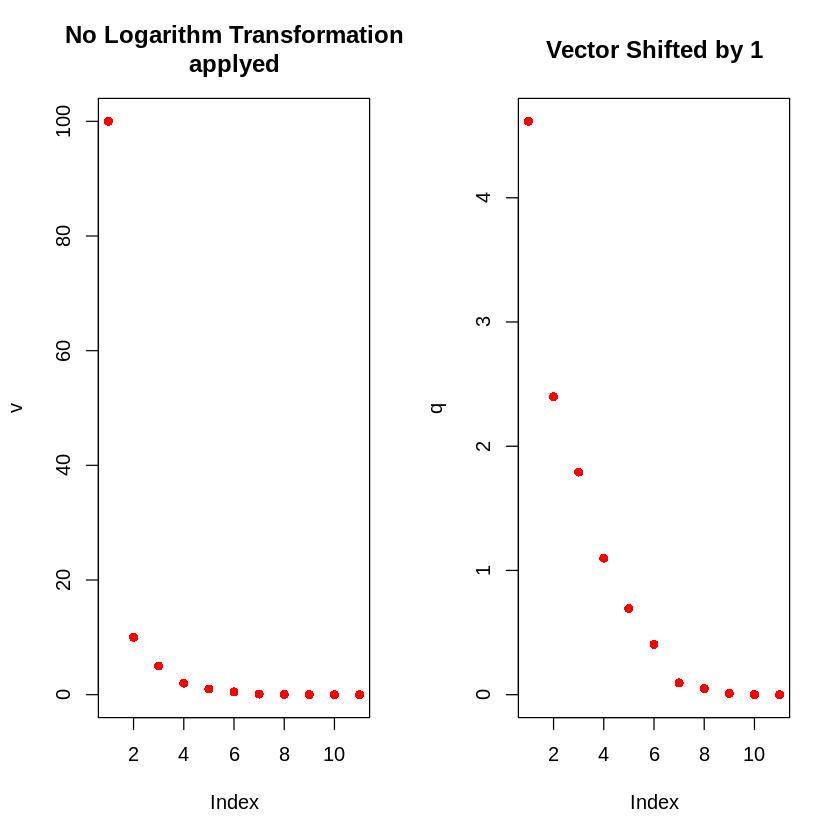

In [7]:
#@markdown 👈 Run this cell to plot the difference between the vector values before and after the logarithm transformation.

# https://stackoverflow.com/questions/6774339/r-how-do-i-put-two-box-plots-next-to-each-other-keeping-same-y-range-for-both
par(mfrow = c(1, 2))
plot(v, pch=16, col="red", main="No Logarithm Transformation\napplyed")
plot(q, pch=16, col="red", main="Vector Shifted by 1")

#### Shifting Area Variable with Logarithm Transformation

In [8]:
#@markdown 👈 Run this cell to shift the area variable values by 2.

#@markdown Notice that there is not any 0.0 values.

area.log = log(df$area+2)
area.log

[1] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
  [8] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [15] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [22] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [29] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [36] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [43] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [50] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [57] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [64] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [71] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [78] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [85] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [92] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
 [99] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[106] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[113] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[120] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[127] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472
[134] 0.6931472 0.6931472 0.6931472 0.6931472 0.6931472 0.8586616 0.8878913
[141] 0.9042182 0.9360934 0.9593502 0.9969486 1.0188473 1.0647107 1.0818052
[148] 1.0851893 1.1216776 1.1378330 1.1600209 1.2119410 1.2325603 1.2412686
[155] 1.2412686 1.2697605 1.2837078 1.2892326 1.2919837 1.3056265 1.3217558
[162] 1.3609766 1.3711807 1.3737156 1.3887912 1.4206958 1.4562867 1.5062972
[169] 1.5107219 1.5151272 1.5195132 1.5454326 1.5560371 1.6233408 1.7047481
[176] 1.8764069 1.8885837 1.9006139 1.9286187 1.9782390 1.9919755 2.0068708
[183] 2.1258479 2.1781550 2.1927702 2.2016592 2.2181159 2.2300144 2.2407097
[190] 2.3263016 2.3331143 2.3683728 2.3711779 2.4344902 2.4857396 2.4865719
[197] 2.5595502 2.5695541 2.5832426 2.5892667 2.6049094 2.6461748 2.7113780
[204] 2.7536607 2.7719635 2.8075938 2.8593396 2.9549103 3.0554153 3.2351428
[211] 3.2669038 3.3322045 3.3368366 3.3792925 3.4229589 3.4229589 3.4493524
[218] 3.4756862 3.5180911 3.5222344 3.5284172 3.6344233 3.6597081 3.6640743
[225] 3.6816030 3.9229629 3.9390543 4.0993321 4.1911687 4.2945606 4.5052393
[232] 4.5765649 4.6576678 4.6789781 5.0554812 5.2906883 5.3129104 5.3700797
[239] 6.9965351 0.6931472 0.6931472 0.6931472 2.4956817 0.6931472 1.5830939
[246] 1.0152307 0.7371641 1.0116009 0.6931472 1.4973884 0.9858168 0.8064759
[253] 0.7929925 1.2584610 2.5128460 0.6931472 2.3045831 0.9858168 0.6931472
[260] 1.2178757 2.3841651 1.6677068 1.8325815 1.2697605 2.1447610 1.0260416
[267] 0.7747272 0.6931472 0.6931472 1.8562980 0.9242589 2.4221443 1.6272778
[274] 2.3960754 2.5794590 1.9987736 2.9882040 2.5439614 3.1793030 2.4655539
[281] 2.4221443 3.2872819 0.6931472 1.1314021 3.2672850 0.6931472 0.6931472
[288] 0.6931472 0.6931472 0.6931472 0.6931472 2.3025851 1.5347144 4.4824374
[295] 2.1482677 0.6931472 1.0647107 0.6931472 0.6931472 0.6931472 0.6931472
[302] 1.7083779 0.6931472 0.6931472 0.6931472 0.6931472 0.8796267 1.9712994
[309] 0.6931472 0.6931472 0.6931472 2.7905514 0.6931472 0.6931472 1.2753628
[316] 0.6931472 0.6931472 1.7544037 0.6931472 1.8578593 3.5934693 2.2202899
[323] 1.1019401 1.4303112 1.8594181 0.6931472 0.6931472 0.6931472 0.6931472
[330] 1.6733512 2.1494339 2.8701691 2.5817308 1.4182774 0.6931472 0.6931472
[337] 0.6931472 4.0611324 2.2491843 1.2441546 1.7800242 0.6931472 0.6931472
[344] 1.4303112 2.0918641 2.0579625 3.4075107 0.6931472 0.6931472 1.2919837
[351] 1.7422190 2.2310891 1.3937664 1.3137237 2.0756845 2.7120422 1.1817272
[358] 0.6931472 0.6931472 2.3145137 1.1281711 1.7817091 0.9242589 1.5953390
[365] 2.0347056 3.0924052 1.3217558 0.6931472 2.68

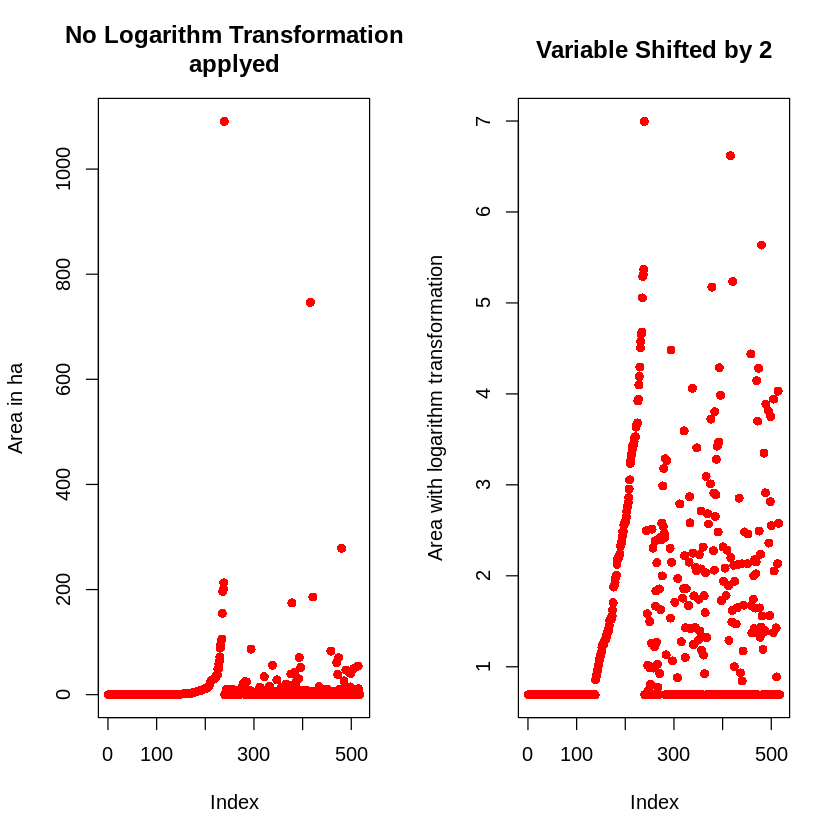

In [9]:
#@markdown 👈 Run this cell to plot the difference between the area values before and after the logarithm transformation.

#@markdown By transforming area values we can see on the right plot the dots more spread in the graph.

par(mfrow = c(1, 2))
plot(df$area, pch=16, col="red", main="No Logarithm Transformation\napplyed", ylab="Area in ha")
plot(area.log, pch=16, col="red", main="Variable Shifted by 2", ylab="Area with logarithm transformation")

### Choose a relevant encoding technique to transform the categorical data to numeric format.

In [10]:
#@markdown 👈 Please, run this cell to retrive all the categorical data and save it in a object called categorical. See below grouped the categorical data.

categorical <- df[lapply(colnames(df), function(x) class(df[[x]]) == 'character') == TRUE]
head(categorical)

,month,day
,<chr>,<chr>
1,mar,fri
2,oct,tue
3,oct,sat
4,mar,fri
5,mar,sun
6,aug,sun


In [11]:
#@markdown 👈 Please, run this cell to first convert the first letter of each string to upper case. The built-in package and DescTools rely on three-letter abbreviations.

#@markdown Once the values of the variables are converted to the right format they will be converted to integer numbers.

categorical$month <- gsub("\\b([a-z])", "\\U\\1", categorical$month, perl=TRUE)
categorical$day <- gsub("\\b([a-z])", "\\U\\1", categorical$day, perl=TRUE)

month.num <- match(categorical$month, month.abb)
day.week.num <- match(categorical$day, day.abb)

numericalDate <- data.frame(
  month = categorical$month,
  month.num = month.num,
  day = categorical$day,
  day.week.num = day.week.num
)

In [12]:
#@markdown 👈 Please, run this cell to show the month, day, and their respective values.

head(numericalDate, 10)

,month,month.num,day,day.week.num
,<chr>,<int>,<chr>,<int>
1,Mar,3,Fri,5
2,Oct,10,Tue,2
3,Oct,10,Sat,6
4,Mar,3,Fri,5
5,Mar,3,Sun,7
6,Aug,8,Sun,7
7,Aug,8,Mon,1
8,Aug,8,Mon,1
9,Sep,9,Tue,2


### Formulate the questions for EDA (Exploratory Data Analysis) and perform EDA based on the data provided and address the issues to understand the impact of fire and the resulting burned area.

In [13]:
#@markdown 👈 Please, run this cell to take a closer look at the data.

head(df)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


<p align="justify">
&emsp;&emsp;By running the function <b>head</b> we can have an overview of the data set. If the data set is not larger than fifteen attributes (columns) we should be able to see the names and the first five rows for each. This first information can give you an idea of what the values are or look like. Also, as Cortez and Morais stated in the research zero values mean they are lower Also, as Cortez and Morais stated in the research zero values mean they are lower than one hectare divided by one hundred which is one hundred squared meters.
</p>
<blockquote cite="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">
<q>
As previously stated, all entries denote fire occurrences and zero value means that an area lower than 1ha/100 = 100m2 was burned (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>

In [14]:
#@markdown 👈 Please, run this cell to show the dimention of the data set.

dim(df)

[1] 517  13

<p align="justify">
&emsp;&emsp;This data set comprises 517 observations and 13 characteristics. Out of which one is an output attribute.
</p>
<blockquote cite="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">
<q>
In [Cortez and Morais, 2007], the output 'area' was first transformed with a ln(x+1) function (<a href="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">UCI Machine Learning Repository, 2022</a>).
</q>
</blockquote>

In [15]:
#@markdown 👈 Please, run this cell to show summary of the data set.

summary(df)

       X               Y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      FFMC            DMC              DC             ISI        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp             RH              wind            

<p align="justify">
&emsp;&emsp;There is noticeable difference between 3rd quartile and the max values of predictors "rain", and "area".
<br>
&emsp;&emsp;Thus this observation suggest that there is potential values-outliers in our data set.
<br>
</p>

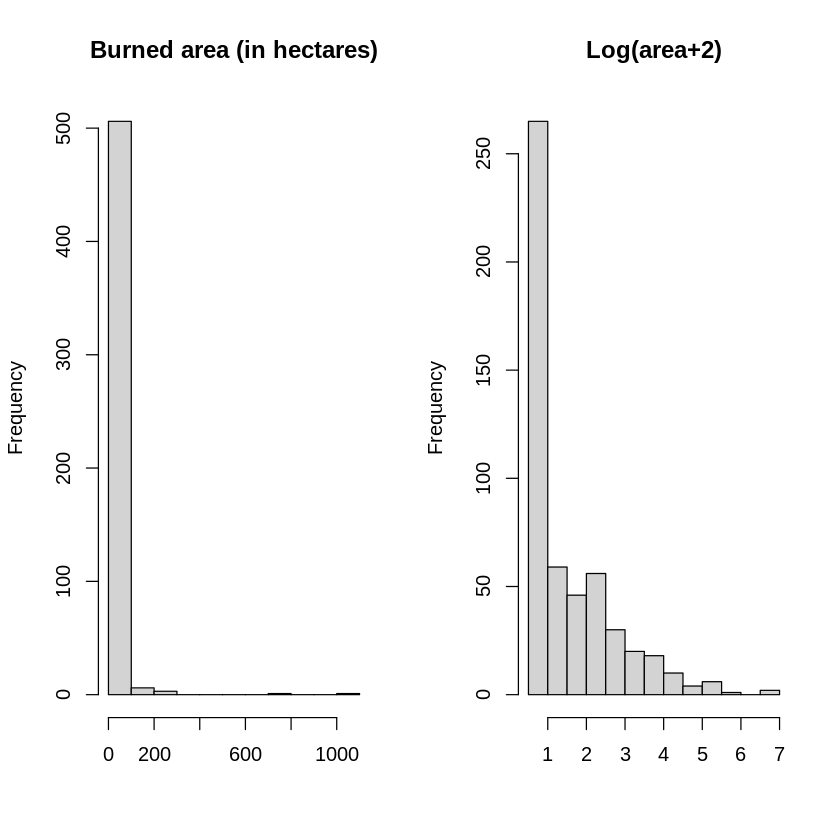

In [16]:
#@markdown 👈 Please, run this cell to plot the burned area in hectares and tranformed with logarithm tranformation.

par(mfrow = c(1, 2))
hist(df$area, main="Burned area (in hectares)", xlab="")
hist(area.log, main="Log(area+2)", xlab="")

<p align="justify">
&emsp;&emsp;The histogram on the left, represents the burned area in hectares. As we expected there are outliers. The histogram on the right, we have rrespective logarithm trasform.
</p>

In [17]:
#@markdown 👈 Please, run this cell to show the correlation of a variable agaist other.

defcorr <- cor(df[,5:13])
defcorr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.00000000,0.38261880,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,0.38261880,1.00000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,0.33051180,0.68219161,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.53180493,0.30512783,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,0.43153226,0.46959384,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,-0.30099542,0.07379494,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,-0.02848481,-0.10534225,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.05670153,0.07478998,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729
area,0.04012200,0.07299430,0.04938323,0.008257688,0.09784411,-0.07551856,0.01231728,-0.007365729,1.000000000


<p align="justify">
&emsp;&emsp;If two variables have perfect correlation (correlation is a subjective term here) the value will be equal to 1. If there is no correlation between variables the value is equal to 0. When the value of the variable increases and the value of the other variable decreases, we call it a perfect negative correlation. When you have a perfect negative correlation the value is equal to -1.
<br>
&emsp;&emsp;A good correlation is considered 6 and above, or -6 and below.

See the definition by W3Schools in its serie about data scienece (<a href="https://www.w3schools.com/datascience/ds_stat_correlation.asp">W3schools, 2022</a>).

<ul>
  <li>1 = there is a perfect linear relationship between the variables (like Average_Pulse against Calorie_Burnage)</li>
  <li>0 = there is no linear relationship between the variables</li>
  <li>-1 = there is a perfect negative linear relationship between the variables (e.g. Less hours worked, leads to higher calorie burnage during a training session)</li>
</ul>
</p>

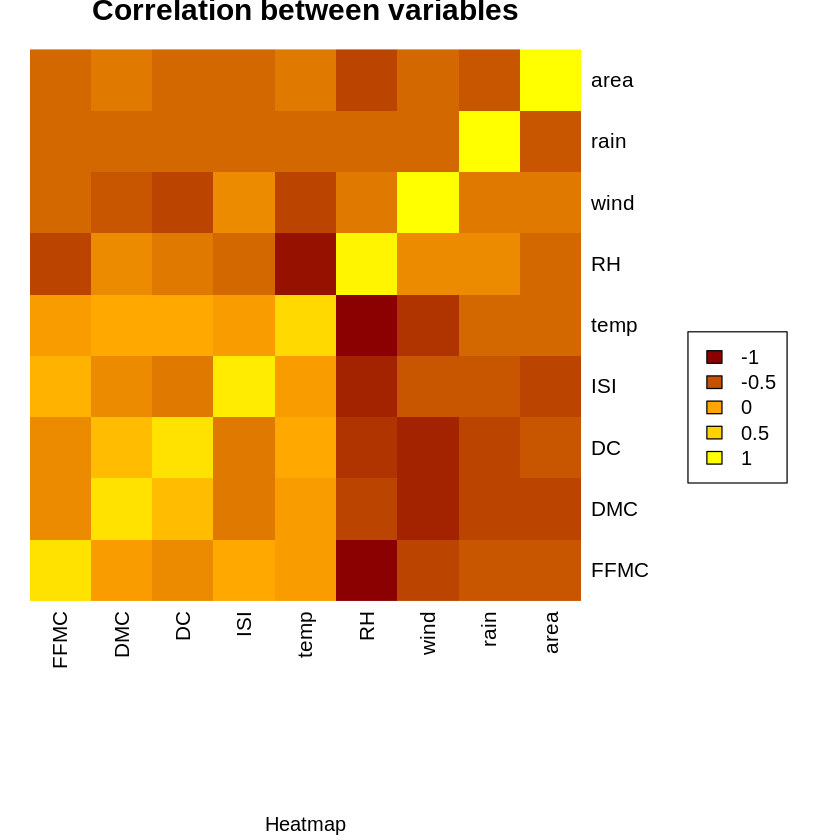

In [18]:
#@markdown 👈 Please, run this cell to plot the correlation results in a heatmap.

colorheatmap <- colorRampPalette(c("darkred", "orange", "yellow"))
heatmap(defcorr, Rowv=NA, Colv=NA, col=colorheatmap(20), margins = c(12, 12), main="Correlation between variables", xlab="Heatmap")
legend(x="right", legend=c("-1", "-0.5", "0", "0.5", "1"), fill=colorheatmap(5))

<p align="justify">
&emsp;&emsp;We can observe there is some correlation between the Initial Spread Index (ISI) and the Fine Fuel Moisture Code (FFMC). The correlation percentage is approximately 53%. Also, we can see that the temperature variable has some correlation with FFMC, Duff Moisture Code (DMC), and Drought Code (DC).
Notice that there is a negative correlation of -0.52 between the relative humidity (RH) and the temperature, which is 52%.
<br>
&emsp;&emsp;As we discuss, a good correlation can be 6 and above, or -6 and below. Although the correlation between temperature and burned are is approximately 0.097, it does not mean there is no correlation at all. It means there is a 9.7% of correlation.
</p>

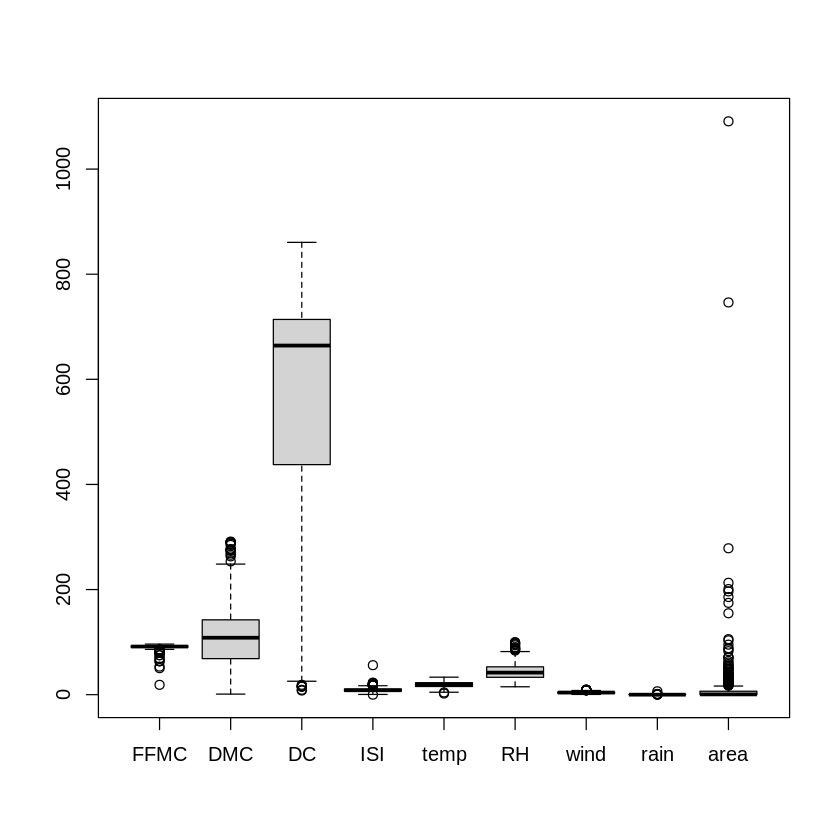

In [19]:
#@markdown 👈 Please, run this cell to plot a boxplot for each variable.

boxplot(df[,5:13])

<p align="justify">
&emsp;&emsp;Outliers are either three times Interquartile Range (IQR) or above the 3rd quartile or below the 1st quartile.
<br>
&emsp;&emsp;In our data set all all variables show some kind of outliers. As we mentioned before, the variable area show the largest discrepancy since the data is skewed towards 0.0.
</p>

### Explain the purpose of PCA (Principal Component Analysis) and how It is effective to reduce dimensionality of the dataset. Find two components of the above data set.

<p align="justify">
&emsp;&emsp;According to Dr Mike Pound Principal Component Analysis is perhaps the most used data reduction technique in the world (<a href="https://youtu.be/TJdH6rPA-TI">Computerphile
, 2019</a>).
<br>
&emsp;&emsp;PCA is the idea of finding a different view for data in which we can organise it better. It can cluster data in a way that benefits the model for machine learning. PCA allows you to reduce the number of dimensions and we can isolate attributes we do not want to delete from our data set.
<br>
&emsp;&emsp;PCA put the data in perspective in many dimensions, each dimension is an angle from where you can see the data.
</p>


In [20]:
#@markdown 👈 Please, run this cell to extract the numerical values from the data set.

df_numerical <- df[,5:11]
df_numerical <- cbind(df_numerical, area.log)

In [21]:
#@markdown 👈 Please, run this cell to apply PCA for data reduction.

df_pca <- prcomp(df_numerical[,c(5,8)], center=TRUE, scale.=TRUE)
summary(df_pca)

Importance of components:
                          PC1    PC2
Standard deviation     1.0277 0.9715
Proportion of Variance 0.5281 0.4719
Cumulative Proportion  0.5281 1.0000

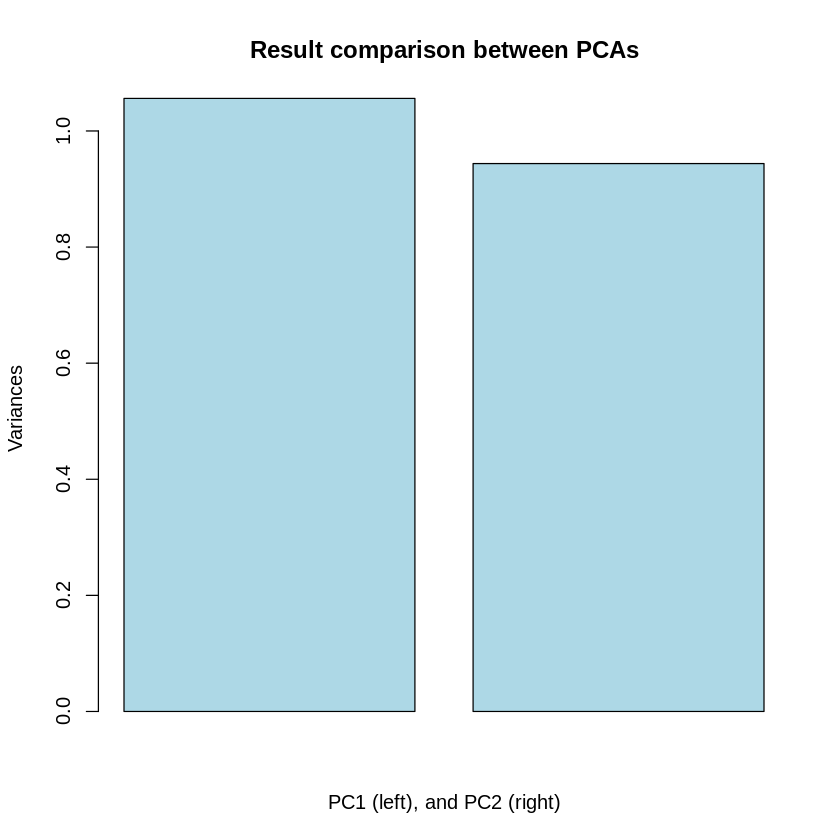

In [22]:
#@markdown 👈 Please, run this cell to plot a bar plot comparing the PCAs.

plot(df_pca, main="Result comparison between PCAs", xlab="PC1 (left), and PC2 (right)", col='lightblue')

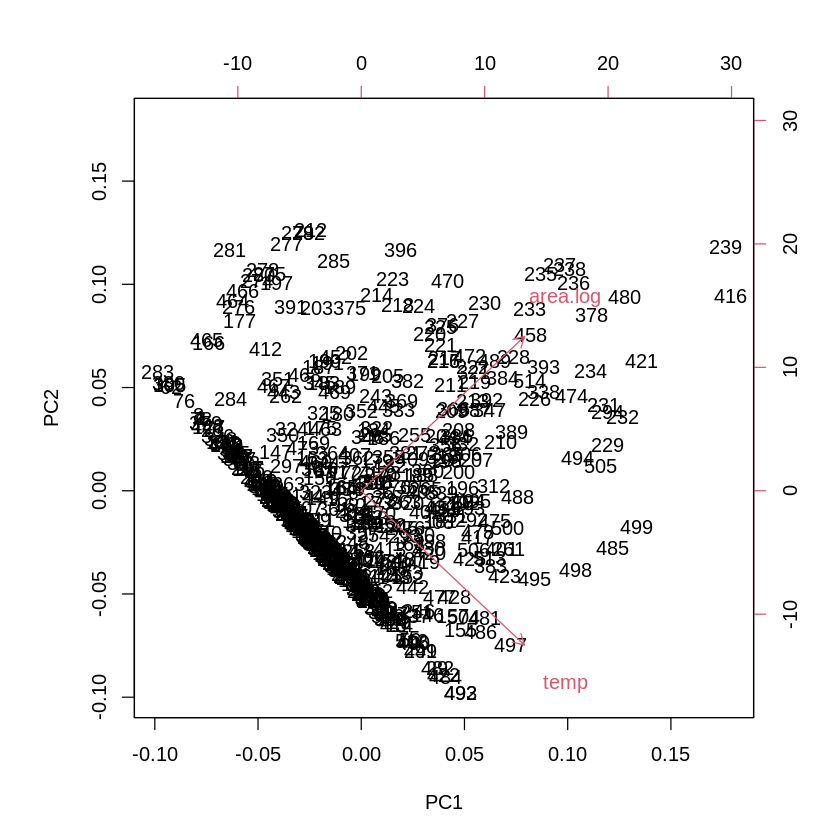

In [23]:
#@markdown 👈 Please, run this cell to show a biplot of all PCAs for the variables log(area+2) and temperature

biplot(df_pca, choices=c(1,2))

### Analyse the benefits and drawbacks for feature selection and extraction techniques. Which features are important from the provided dataset? (Feature Selection Method)

<p align="justify">
&emsp;&emsp;Feature Selection is used to remove irrelevant features to improve model performance, understand better the model, and make the model run faster.
We can apply some techniques to perform Feature Selection (<a href="https://youtu.be/YaKMeAlHgqQ">Data School, 2022</a>).


<h4>Percent Missing Values</h4>

<ul>
  <li>Remove variables that have a high percentage of missing values.</li>
  <li>Review or visualize variables with a high percentage of missing values.</li>
</ul>

&emsp;&emsp;This is useful because features that are mostly missing values are hard to learn from.

<h4>Amount of Variation</h4>

<ul>
  <li>Remove or review variables that have a very low variation.</li>
  <li>Either standardize all variables or use standard deviation to account for variables with different scales.</li>
</ul>

<h4>Pairwise Correlation</h4>

<ul>
  <li>Many variables are often correlated with each other, and hence are redundant.</li>
  <li>If two variables are highly correlated, keeping only one will help reduce dimensionality without much loss of information.</li>
</ul>

&emsp;&emsp;Removing variables that have a very low correlation with the target is also a technique for Feature Selection. However, no technique is a silver bullet. You should always review the data because two variables might have a low correlation with the target, but combined can have an impact on the final prediction.

&emsp;&emsp;You should always run the model without implementing too many techniques first, so you can compare and know what features or features can actually improve your prediction.

<h4>Features Analysis for Forest Fires Date Set </h4>

&emsp;&emsp;I believe the features in the data set are necessary, we might have to remove some observation if we decide to keep the variable area, or drop that variable to predict its values again from a whole new model.

&emsp;&emsp;From Cortez and Morais point of view, they believed that additional information is required, such as the type of vegetation and firefighting intervention.
</p>

<blockquote cite="https://repositorium.sdum.uminho.pt/handle/1822/8039">
<q>
To improve it, we believe that additional information (not available
in this study) is required, such as the type of vegetation and firefighting intervention
(e.g. time elapsed and firefighting strategy). Nevertheless, the proposed model is still
useful to improve firefighting resource management (<a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">Paulo Cortez, 2007</a>).
</q>
</blockquote>

<p align="justify">
&emsp;&emsp;Let's review some of the data set variables. This data set has the following FWI Fuel Moisture Code, definition by NWCG (<a href="https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system">NWCG, 2021</a>):

<b>&emsp;&emsp;Fine Fuel Moisture Code (FFMC)</b> - represents fuel moisture of forest litter fuels under the shade of a forest canopy. It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag.

<b>&emsp;&emsp;Duff Moisture Code (DMC)</b> - represents fuel moisture of decomposed organic material underneath the litter. System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels.

<b>&emsp;&emsp;Drought Code (DC)</b> - much like the Keetch-Byrum Drought Index, represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day (1272 hour) timelag fuels.

<b>&emsp;&emsp;Initial Spread Index (ISI)</b> - is analogous to the NFDRS Spread Component (SC). It integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential. ISI is a key input for fire behavior predictions in the FBP system.
</p>

### Prepare the data for the machine learning model after encoding and feature selection, predict the burned area of forest fires using the machine learning model.

In [24]:
#@markdown 👈 Please, run this cell to take a look at the current data that will be used for our model which eventually will be used for the data prediction.

head(df_numerical)

,FFMC,DMC,DC,ISI,temp,RH,wind,area.log
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.6931472
2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.6931472
3,90.6,43.7,686.9,6.7,14.6,33,1.3,0.6931472
4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.6931472
5,89.3,51.3,102.2,9.6,11.4,99,1.8,0.6931472
6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.6931472


In [25]:
#@markdown 👈 Please, run this cell to partition the data set and then create the model.

#@markdown 80% of the selected data destined to the training set and 20% to the testing set.

set.seed(100)

TrainingIndex <- createDataPartition(df_numerical$area.log, p=0.8, list=FALSE)
TrainingSet <- df_numerical[TrainingIndex, ]
TestingSet <- df_numerical[-TrainingIndex, ]

Model <- train(area.log ~ ., data=TrainingSet,
                method="lm",
                na.action = na.omit,
                preProcess=c("scale", "center"),
                trControl=trainControl(method="none"))

In [26]:
#@markdown 👈 Please, run this cell to start training the model and then test it.

Model.training <- predict(Model, TrainingSet)
Model.testing <- predict(Model, TestingSet)

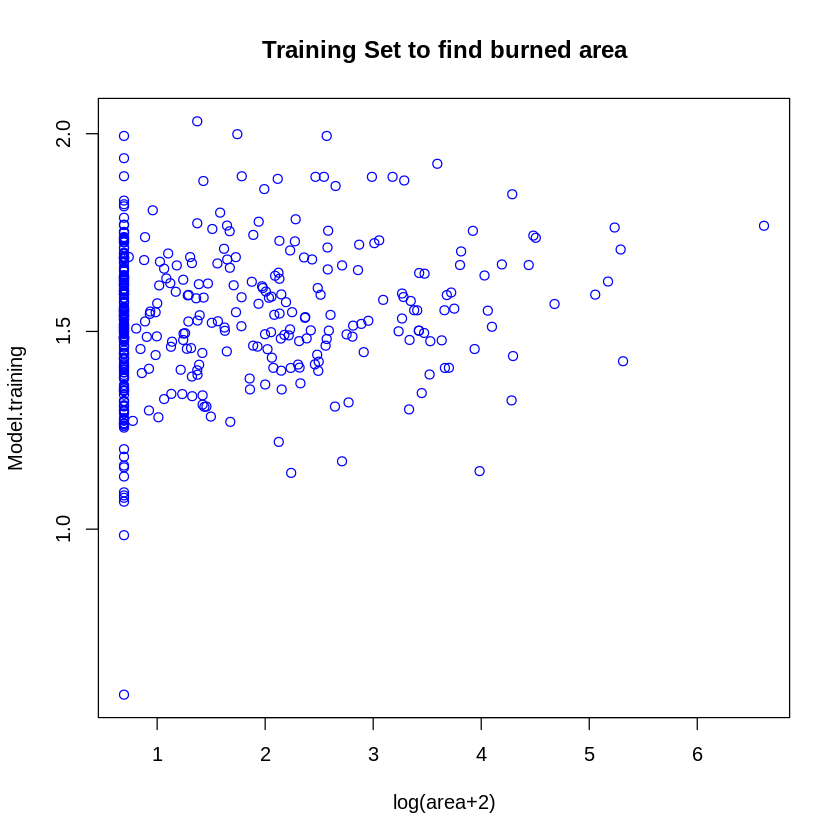

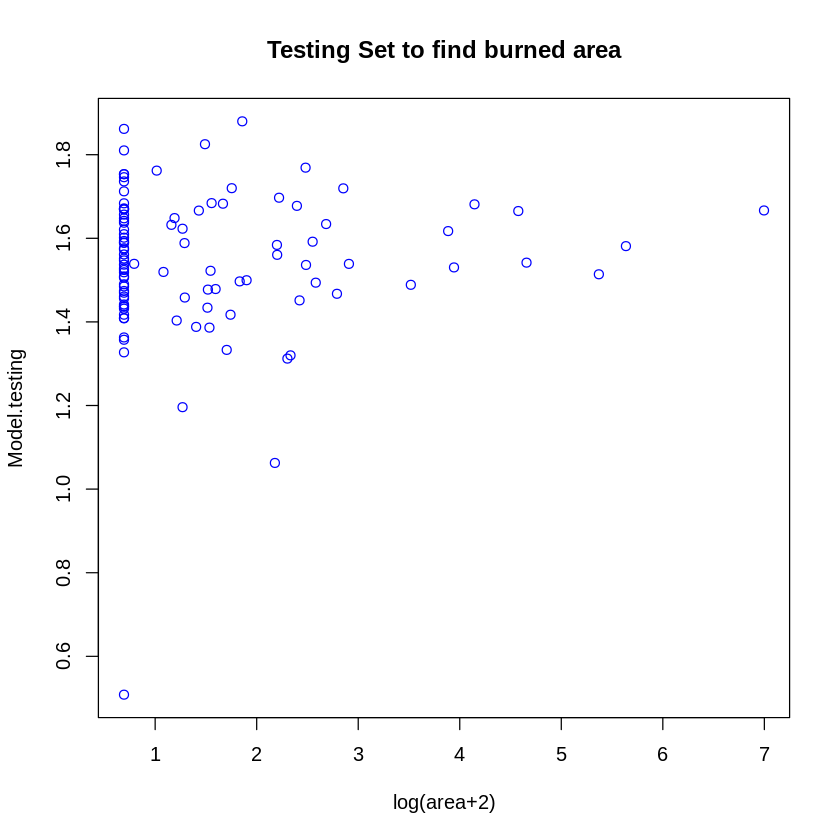

In [27]:
#@markdown 👈 Please, run this cell to plot the results of the training set and testing set.

plot(TrainingSet$area.log, Model.training, main="Training Set to find burned area", xlab="log(area+2)", col="blue")
plot(TestingSet$area.log, Model.testing, main="Testing Set to find burned area", xlab="log(area+2)", col="blue")

In [28]:
#@markdown 👈 Please, run this cell to show a summary of the model.

summary(Model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3012 -0.8294 -0.4948  0.5955  4.8506 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.536749   0.054889  27.998   <2e-16 ***
FFMC         0.038556   0.073891   0.522   0.6021    
DMC          0.077342   0.083650   0.925   0.3557    
DC           0.056024   0.080519   0.696   0.4870    
ISI         -0.087843   0.072882  -1.205   0.2288    
temp         0.009316   0.091107   0.102   0.9186    
RH          -0.054662   0.074775  -0.731   0.4652    
wind         0.137780   0.058897   2.339   0.0198 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.12 on 408 degrees of freedom
Multiple R-squared:  0.02421,	Adjusted R-squared:  0.007469 
F-statistic: 1.446 on 7 and 408 DF,  p-value: 0.1852


<p align="justify">
&emsp;&emsp;The highest value in the Estimate column show which values influence our positively or negatively model.  We got a residual standard error of 1.12 and a multiple R-squared correlation coefficient of 0.02421.
</p>

### You are free to perform any process to enhance an understanding of data preparation and exploration of the Forest data set.

In [47]:
#@markdown 👈 Please, run this cell to inverse the square root of the area variable (log(area+2)).

# Inverse Square Root transformation
invsqrt_area <- 1 / sqrt(area.log)
invsqrt_area

[1] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
  [8] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [15] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [22] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [29] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [36] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [43] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [50] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [57] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [64] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [71] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [78] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [85] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [92] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
 [99] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
[106] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
[113] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
[120] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
[127] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224
[134] 1.2011224 1.2011224 1.2011224 1.2011224 1.2011224 1.0791678 1.0612559
[141] 1.0516310 1.0335712 1.0209663 1.0015292 0.9907075 0.9691348 0.9614473
[148] 0.9599470 0.9442043 0.9374772 0.9284683 0.9083626 0.9007327 0.8975675
[155] 0.8975675 0.8874402 0.8826061 0.8807129 0.8797747 0.8751662 0.8698100
[162] 0.8571852 0.8539897 0.8532015 0.8485580 0.8389758 0.8286603 0.8147881
[169] 0.8135940 0.8124104 0.8112370 0.8044054 0.8016596 0.7848653 0.7658962
[176] 0.7300229 0.7276657 0.7253591 0.7200735 0.7109853 0.7085296 0.7058953
[183] 0.6858575 0.6775722 0.6753104 0.6739458 0.6714410 0.6696474 0.6680473
[190] 0.6556423 0.6546844 0.6497929 0.6494084 0.6409084 0.6342671 0.6341609
[197] 0.6250549 0.6238370 0.6221819 0.6214578 0.6195890 0.6147390 0.6073024
[204] 0.6026217 0.6006289 0.5968056 0.5913807 0.5817386 0.5720907 0.5559725
[211] 0.5532633 0.5478153 0.5474350 0.5439852 0.5405043 0.5405043 0.5384324
[218] 0.5363888 0.5331464 0.5328327 0.5323657 0.5245444 0.5227292 0.5224177
[225] 0.5211725 0.5048855 0.5038532 0.4939050 0.4884638 0.4825481 0.4711303
[232] 0.4674446 0.4633570 0.4623006 0.4447529 0.4347543 0.4338442 0.4315286
[239] 0.3780581 1.2011224 1.2011224 1.2011224 0.6330025 1.2011224 0.7947795
[246] 0.9924706 1.1647103 0.9942495 1.2011224 0.8172083 1.0071679 1.1135361
[253] 1.1229630 0.8914154 0.6308369 1.2011224 0.6587245 1.0071679 1.2011224
[260] 0.9061467 0.6476373 0.7743551 0.7387004 0.8874402 0.6828268 0.9872281
[267] 1.1361237 1.2011224 1.2011224 0.7339664 1.0401673 0.6425397 0.7839153
[274] 0.6460256 0.6226381 0.7073237 0.5784887 0.6269671 0.5608336 0.6368582
[281] 0.6425397 0.5515457 1.2011224 0.9401378 0.5532310 1.2011224 1.2011224
[288] 1.2011224 1.2011224 1.2011224 1.2011224 0.6590102 0.8072094 0.4723271
[295] 0.6822692 1.2011224 0.9691348 1.2011224 1.2011224 1.2011224 1.2011224
[302] 0.7650821 1.2011224 1.2011224 1.2011224 1.2011224 1.0662297 0.7122356
[309] 1.2011224 1.2011224 1.2011224 0.5986252 1.2011224 1.2011224 0.8854889
[316] 1.2011224 1.2011224 0.7549796 1.2011224 0.7336579 0.5275250 0.6711122
[323] 0.9526229 0.8361510 0.7333503 1.2011224 1.2011224 1.2011224 1.2011224
[330] 0.7730480 0.6820841 0.5902640 0.6223641 0.8396908 1.2011224 1.2011224
[337] 1.2011224 0.4962225 0.6667875 0.8965259 0.7495266 1.2011224 1.2011224
[344] 0.8361510 0.6914062 0.6970778 0.5417281 1.2011224 1.2011224 0.8797747
[351] 0.7576151 0.6694861 0.8470421 0.8724649 0.6940957 0.6072280 0.9199016
[358] 1.2011224 1.2011224 0.6573098 0.9414831 0.7491721 1.0401673 0.7917235
[365] 0.7010503 0.5686589 0.8698100 1.2011224 0.61

Warning message in box(which = "plot", Ity = "solid", col = "black"):
“"Ity" is not a graphical parameter”


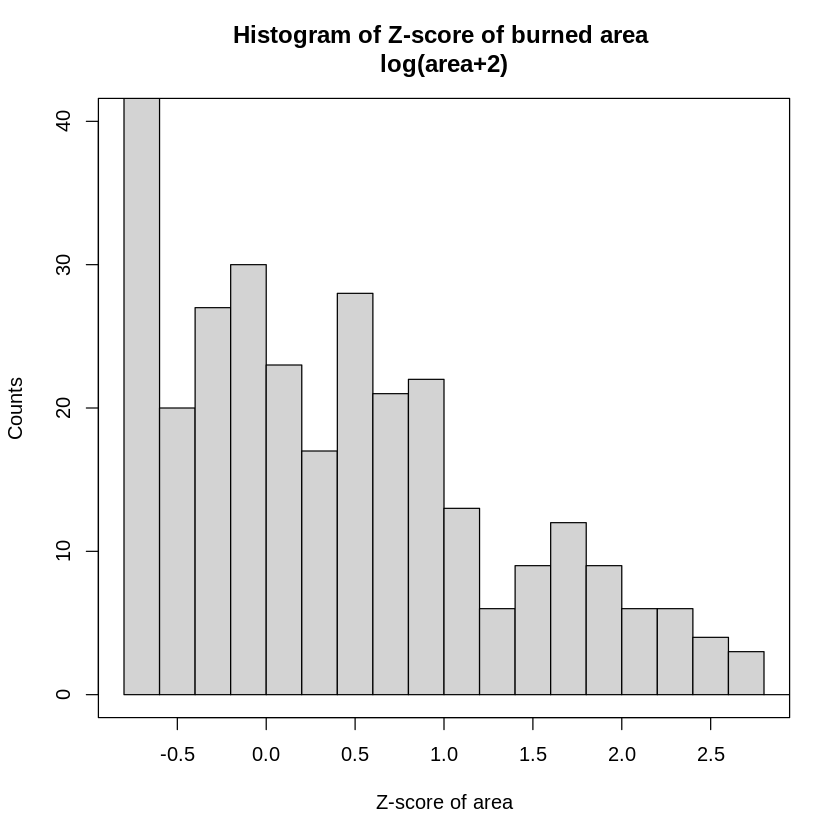

In [57]:
#@markdown 👈 Please, run this cell to calculate the Z-Score of burned area and plot the result in histogram plot.
zscore_area <- zscore(area.log)

hist(zscore_area,
      breaks = 30,
      xlim = c(-0.8, 2.8),
      ylim = c(0, 40),
      main = "Histogram of Z-score of burned area \nlog(area+2)",
      xlab = "Z-score of area",
      ylab = "Counts")

box(which = "plot",
    Ity = "solid",
    col="black")

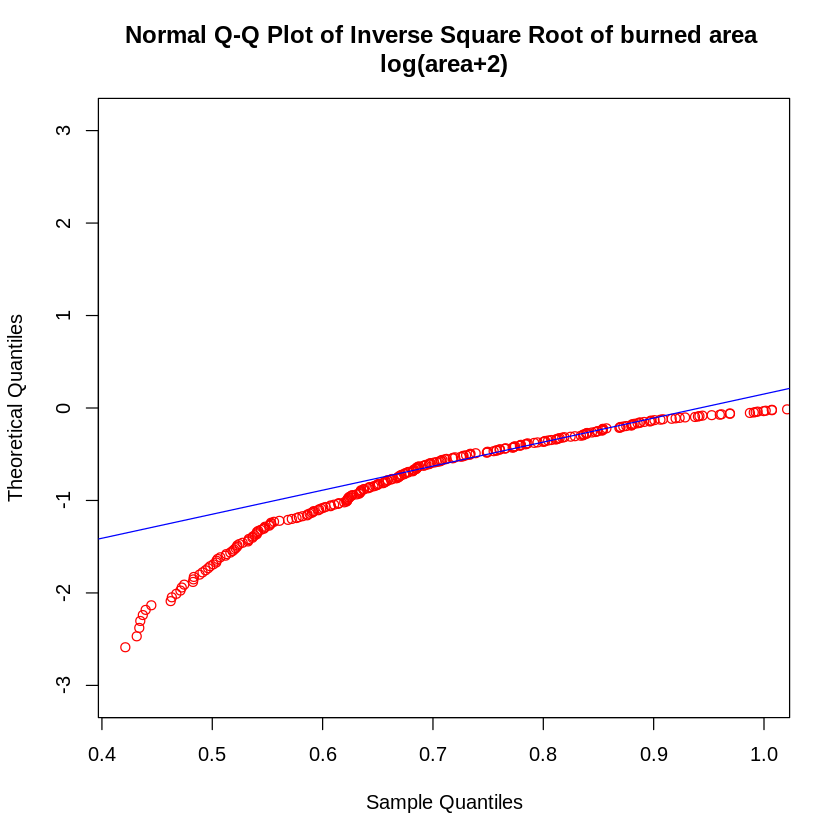

In [65]:
#@markdown 👈 Please, run this cell to plot the Normal Q-Q of Inverse Square Root of burned area.

par(mfrow = c(1,1))

qqnorm(invsqrt_area,
       datax = TRUE,
       col = "red",
       ylim = c(0.42, 1),
       main = "Normal Q-Q Plot of Inverse Square Root of burned area \nlog(area+2)")

qqline(invsqrt_weight,
       col = "blue",
       datax = TRUE)

Warning message in box(which = "plot", Ity = "solid", col = "black"):
“"Ity" is not a graphical parameter”


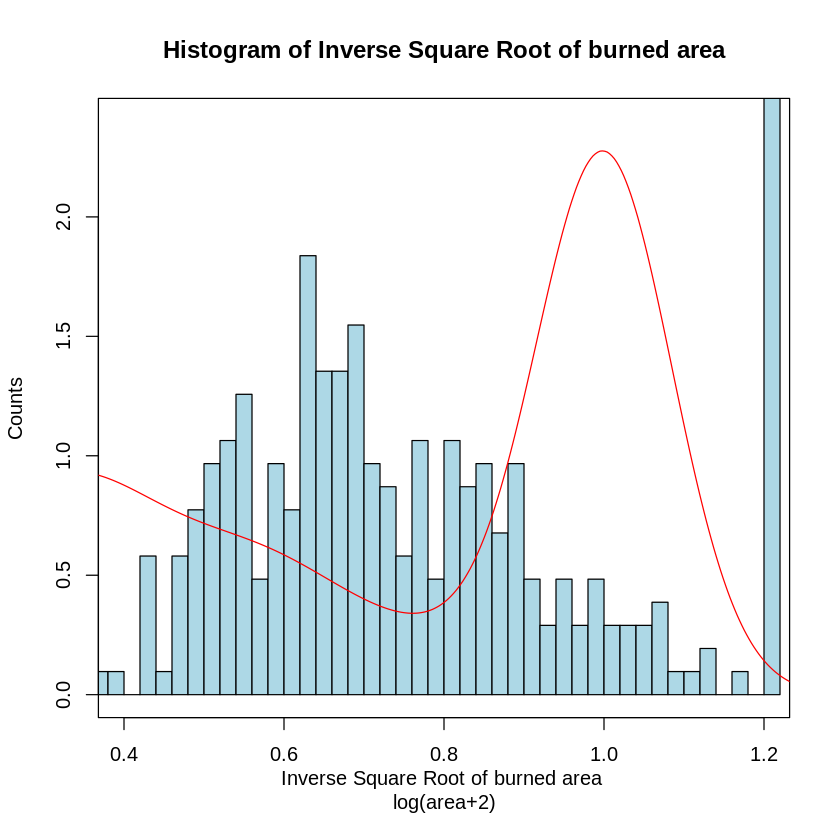

In [67]:
#@markdown 👈 Please, run this cell to plot a histogram with fitted normal distribution.

x <- mmnorm(invsqrt_area)

par(mfrow = c(1,1))

hist(invsqrt_area,
     breaks = 30,
     xlim = c(0.4, 1.2),
     ylim = c(0, 2.4),
     col = "lightblue",
     prob = TRUE,
     border = "black",
     xlab = "Inverse Square Root of burned area \nlog(area+2)",
     ylab = "Counts",
     main = "Histogram of Inverse Square Root of burned area")

box(which = "plot",
    Ity = "solid",
    col="black")
    lines(density(x),
    col = "red")

## References

<p>
Analytics Vidhya, 2016, <i>Introduction to Feature Selection methods with an example (or how to select the right variables?)<i>. [Online]</br>
Available at: <a href="https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/">https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/</a></br>
[Accessed 13 January 2022].
</p>
</br>
<p>
Computerphile, 2019, <i>Data Analysis 6: Principal Component Analysis (PCA) - Computerphile<i>. [Online]</br>
Available at: <a href="https://youtu.be/TJdH6rPA-TI">https://youtu.be/TJdH6rPA-TI</a></br>
https://youtu.be/TJdH6rPA-TI
</p>
</br>
<p>
Cortez, P., 2007, <i>A data mining approach to predict forest fires using meteorological data<i>. [Online]</br>
Available at: <a href="https://repositorium.sdum.uminho.pt/handle/1822/8039">https://repositorium.sdum.uminho.pt/handle/1822/8039</a></br>
[Accessed 11 January 2022].
</p>
</br>
<p>
Data Professor, 2020, <i>Machine Learning in R: Building a Linear Regression Model<i>. [Online]</br>
Available at: <a href="https://youtu.be/el8xP38SWdk">https://youtu.be/el8xP38SWdk</a></br>
[Accessed 13 January 2022].
</p>
</br><p>
Data School, 2018, <i>How do I select features for Machine Learning?<i>. [Online]</br>
Available at: <a href="https://youtu.be/YaKMeAlHgqQ">https://youtu.be/YaKMeAlHgqQ</a></br>
[Accessed 13 January 2022].
</p>
</br><p>
Datacamp, 2019, <i>keras: Deep Learning in R<i>. [Online]</br>
Available at: <a href="https://www.datacamp.com/community/tutorials/keras-r-deep-learning">https://www.datacamp.com/community/tutorials/keras-r-deep-learning</a></br>
[Accessed 13 January 2022].
</p>
</br><p>
Kopec, D., 2019, <i>Chapter 3. Constraint-satisfaction problems<i>. [Online]</br>
Available at: <a href="https://livebook.manning.com/book/classic-computer-science-problems-in-python/chapter-3/57">https://livebook.manning.com/book/classic-computer-science-problems-in-python/chapter-3/57</a></br>
[Accessed 11 January 2021].
</p>
</br><p>
NWCG, 2021, <i>Fire Weather Index (FWI) System<i>. [Online]</br>
Available at: <a href="https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system">https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system</a></br>
[Accessed 11 January 2020].
</p>
</br><p>
Pantech e Learning, 2022, <i>What are the importance of data mining? What are its uses?<i>. [Online]</br>
Available at: <a href="https://www.pantechelearning.com/importance-of-data-mining-and-its-uses/">https://www.pantechelearning.com/importance-of-data-mining-and-its-uses/</a></br>
[Accessed 12 January 2022].
</p>
</br><p>
Scribbr, 2020, <i>Linear Regression in R | An Easy Step-by-Step Guide<i>. [Online]</br>
Available at: <a href="https://www.scribbr.com/statistics/linear-regression-in-r/">https://www.scribbr.com/statistics/linear-regression-in-r/</a></br>
[Accessed 13 January 2022].
</p>
</br>
<p>
Sumrak, J., 2020, <i>What Is GPT-3: How It Works and Why You Should Care<i>. [Online]</br>
Available at: <a href="https://www.twilio.com/blog/what-is-gpt-3">https://www.twilio.com/blog/what-is-gpt-3</a></br>
[Accessed 11 January 2022].
</p>
</br>
<p>
Towards Data Science, 2018, <i>What is Exploratory Data Analysis?<i>. [Online]</br>
Available at: <a href="https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15">https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15</a></br>
[Accessed 11 January 2022].
</p>
</br>
<p>
Towards Data Science, 2020, <i>WebpaKeras and R: Predicting Blood Glucose Levels with the Sequential Modelge<i>. [Online]</br>
Available at: <a href="https://towardsdatascience.com/keras-and-r-predicting-blood-glucose-levels-with-the-sequential-model-596efe89a6b8">https://towardsdatascience.com/keras-and-r-predicting-blood-glucose-levels-with-the-sequential-model-596efe89a6b8</a></br>
[Accessed 13 January 2022].
</p>
</br>
<p>
UCI Machine Learning Repository, 2022, <i>Forest Fires Data Set<i>. [Online]</br>
Available at: <a href="https://archive.ics.uci.edu/ml/datasets/Forest+Fires">https://archive.ics.uci.edu/ml/datasets/Forest+Fires</a></br>
[Accessed 11 January 2022].
</p>
</br>
<p>
W3schools, 2022, <i>Data Science - Statistics Correlation<i>. [Online]</br>
Available at: <a href="https://www.w3schools.com/datascience/ds_stat_correlation.asp">https://www.w3schools.com/datascience/ds_stat_correlation.asp</a></br>
[Accessed 12 January 2022].
</p>
</br>